In [17]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [18]:
data = yf.download('GOOGL', start='2018-01-01', end='2023-12-31')
data = data[['Close']]  # We'll use only the 'Close' price
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,GOOGL
Date,
2018-01-02,53.405170
2018-01-03,54.316319
2018-01-04,54.527306
2018-01-05,55.250351
2018-01-08,55.445415


In [19]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [20]:
x = []
y = []
seq_len = 60

for i in range(seq_len, len(scaled_data)):
    x.append(scaled_data[i - seq_len:i])
    y.append(scaled_data[i])

x = np.array(x)
y = np.array(y)

In [21]:
split = int(0.8 * len(x))
x_train, x_test = x[:split], x[split:]
y_train, y_test = y[:split], y[split:]

In [22]:
model = Sequential([
    SimpleRNN(50, activation='tanh', return_sequences=False, input_shape=(x.shape[1], 1)),
    Dense(1)
])

D:\ProgramFiles\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0587 - val_loss: 0.0017
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.6300e-04 - val_loss: 0.0013
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.4035e-04 - val_loss: 0.0016
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.7907e-04 - val_loss: 0.0012
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.2554e-04 - val_loss: 0.0012
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.1737e-04 - val_loss: 0.0013
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.9605e-04 - val_loss: 0.0012
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.3639e-04 - val_loss: 0.0010


In [24]:
predicted = model.predict(x_test)
predicted = scaler.inverse_transform(predicted)
actual = scaler.inverse_transform(y_test)

for i in range(10):
    print(f"{i}\t{actual[i][0]:.2f}\t\t{predicted[i][0]:.2f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
0	83.03		93.14
1	86.17		89.71
2	88.07		86.60
3	88.48		85.39
4	86.90		87.06
5	93.49		87.22
6	95.95		89.64
7	95.24		92.07
8	97.97		93.88
9	98.38		96.10


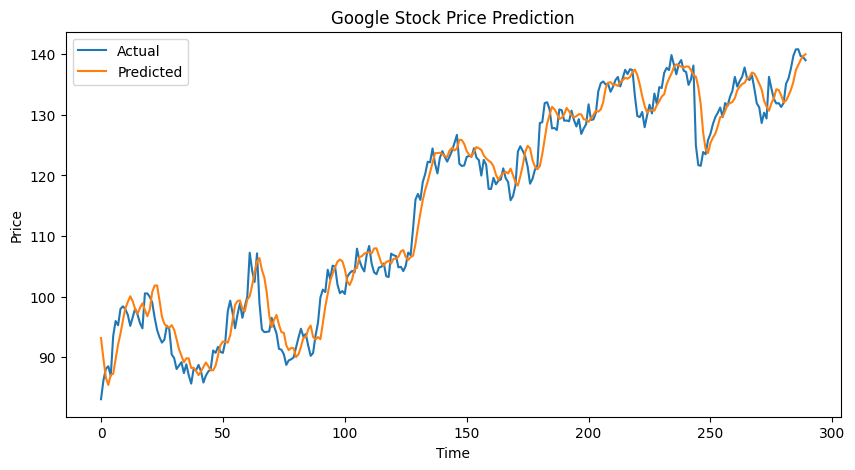

In [25]:
plt.figure(figsize=(10, 5))
plt.plot(actual, label='Actual')
plt.plot(predicted, label='Predicted')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()